In [26]:
import json
import pandas as pd
import numpy as np
import os

# Load the dataset
with open('therapy_data.json', 'r') as f:
    data = json.load(f)

# Convert JSON data to DataFrame
df = pd.DataFrame(data['intents'])

# Transform data into a flat DataFrame
dic = {"tag": [], "patterns": [], "responses": []}
for i in range(len(df)):
    ptrns = df.iloc[i]['patterns']
    rspns = df.iloc[i]['responses']
    tag = df.iloc[i]['tag']
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)

df = pd.DataFrame.from_dict(dic)


In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Preprocess the text data
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['patterns'])
word_index = tokenizer.word_index

# Convert patterns to sequences and pad them
sequences = tokenizer.texts_to_sequences(df['patterns'])
padded_sequences = pad_sequences(sequences, padding='post')

# Encode the labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['tag'])
labels = tf.keras.utils.to_categorical(labels)


In [28]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Define the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=X_train.shape[1]),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=550, validation_data=(X_test, y_test), verbose=2)


2024-05-19 01:56:46.129198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 01:56:46.130990: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 01:56:46.132244: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/550


2024-05-19 01:56:46.873718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 01:56:46.875595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 01:56:46.876697: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6/6 - 7s - loss: 4.3751 - accuracy: 0.0378 - val_loss: 4.3712 - val_accuracy: 0.0000e+00 - 7s/epoch - 1s/step
Epoch 2/550
6/6 - 0s - loss: 4.3293 - accuracy: 0.0432 - val_loss: 4.3533 - val_accuracy: 0.0000e+00 - 286ms/epoch - 48ms/step
Epoch 3/550
6/6 - 0s - loss: 4.2233 - accuracy: 0.0541 - val_loss: 4.3954 - val_accuracy: 0.0000e+00 - 337ms/epoch - 56ms/step
Epoch 4/550
6/6 - 0s - loss: 4.1658 - accuracy: 0.0486 - val_loss: 4.4364 - val_accuracy: 0.0213 - 294ms/epoch - 49ms/step
Epoch 5/550
6/6 - 0s - loss: 4.1514 - accuracy: 0.0541 - val_loss: 4.4015 - val_accuracy: 0.0213 - 333ms/epoch - 55ms/step
Epoch 6/550
6/6 - 0s - loss: 4.0915 - accuracy: 0.0703 - val_loss: 4.3558 - val_accuracy: 0.0213 - 262ms/epoch - 44ms/step
Epoch 7/550
6/6 - 0s - loss: 4.0783 - accuracy: 0.0486 - val_loss: 4.3803 - val_accuracy: 0.0213 - 279ms/epoch - 47ms/step
Epoch 8/550
6/6 - 0s - loss: 3.9748 - accuracy: 0.0649 - val_loss: 4.3650 - val_accuracy: 0.0213 - 238ms/epoch - 40ms/step
Epoch 9/550
6/6 - 0s 

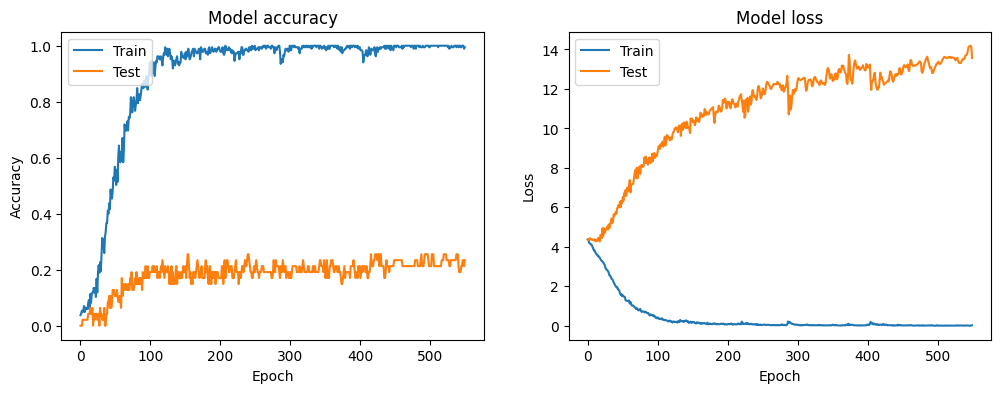

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [38]:
# Function to predict intents based on user input
def predict_intent(user_input):
    user_input_seq = tokenizer.texts_to_sequences([user_input])
    user_input_pad = pad_sequences(user_input_seq, maxlen=X_train.shape[1], padding='post')
    prediction = model.predict(user_input_pad)
    intent = label_encoder.inverse_transform([np.argmax(prediction)])
    return intent[0]

# Function to generate responses based on predicted intents
def generate_response(intent):
    responses = df[df['tag'] == intent]['responses'].values[0]
    response = np.random.choice(responses)
    return response

# Example usage
while True:
    user_input = input("User: ")
    if user_input.lower() == 'quit':
        break
    intent = predict_intent(user_input)
    response = generate_response(intent)
    print("Chatbot:", response)


2024-05-19 02:00:49.389252: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 02:00:49.391013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 02:00:49.392339: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 1s/step
Chatbot: Great to see you. How do you feel currently?
1/1 [==============================] - 0s 15ms/step
Chatbot: I can provide general advice regarding anxiety and depression, answer questions related to mental health and make daily conversations. Do not consider me as a subsitute for an actual mental healthcare worker. Please seek help if you don't feel satisfied with me.
1/1 [==============================] - 0s 15ms/step
Chatbot: I'm here for you. Could you tell me why you're feeling this way?
1/1 [==============================] - 0s 15ms/step
Chatbot: Not sure I understand that.


KeyboardInterrupt: Interrupted by user

In [40]:
import pickle
model.save('chatbot_model.h5')

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('label_encoder.pickle', 'wb') as handle:
    pickle.dump(label_encoder, handle, protocol=pickle.HIGHEST_PROTOCOL)